# Suavização por Média Móvel

Remover estacionaridade, tendencia e tentar aproximar a série temporal de uma Gausiana

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6


In [3]:
temperatura = pd.read_csv('temp_global.csv')
temperatura

,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28
...,...
132,0.60
133,0.63
134,0.66
135,0.75


In [5]:
indice = pd.date_range('1880 Jan 1', periods = len(temperatura), freq = 'Y')
indice

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='A-DEC')

In [6]:
serie = pd.Series(temperatura['x'].values, index = indice)
serie

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: A-DEC, Length: 136, dtype: float64

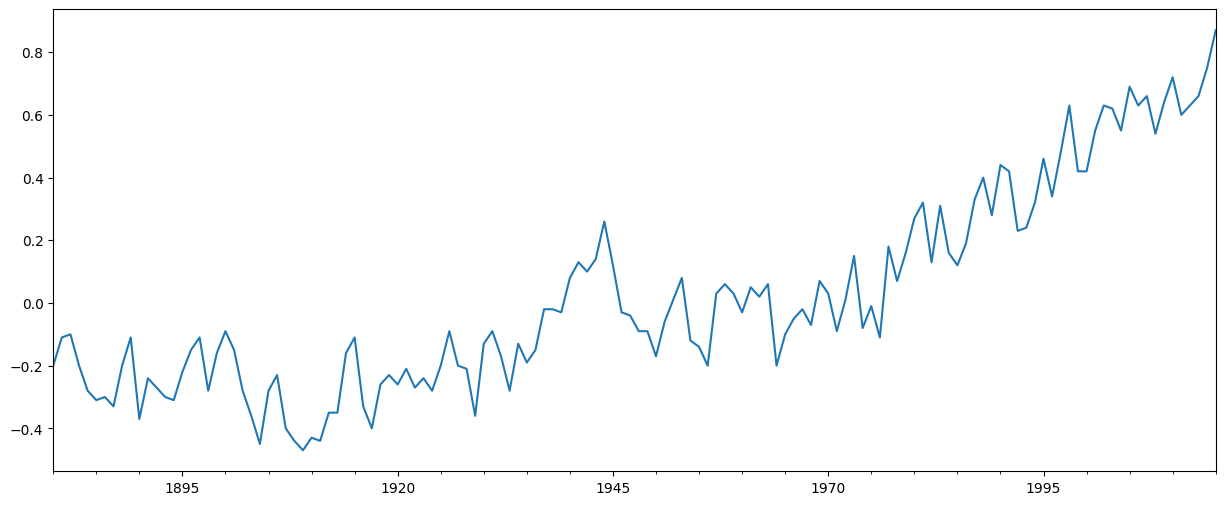

In [7]:
serie.plot()
plt.show()

In [8]:
media_movel1 = serie.rolling(window = 3)
media_movel1 = media_movel1.mean()

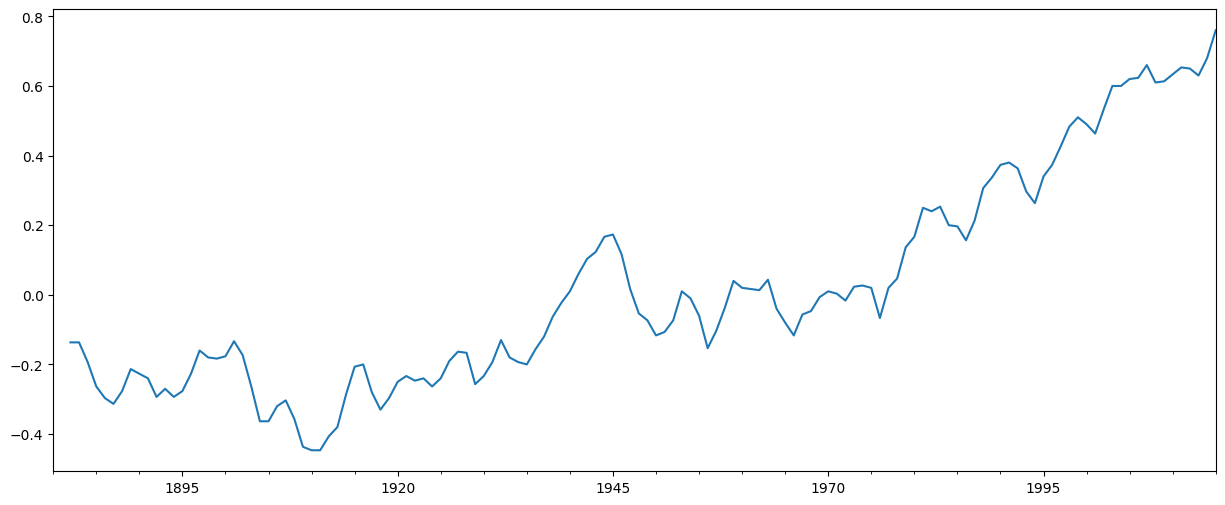

In [9]:
media_movel1.plot()
plt.show()

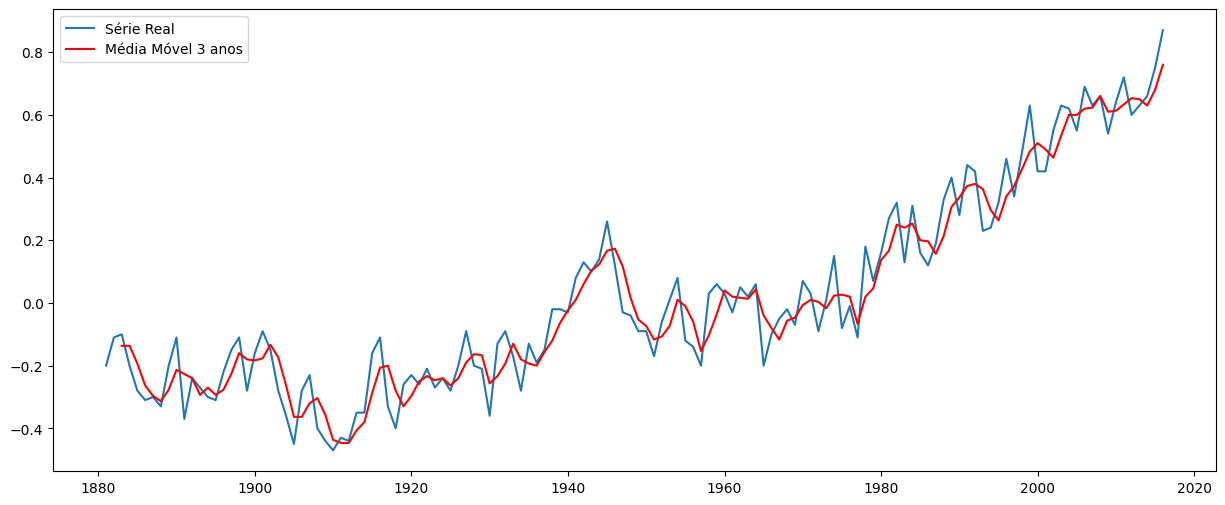

In [10]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1,color='red', label='Média Móvel 3 anos')
plt.legend(loc='best')
plt.show()

In [13]:
media_movel10 = serie.rolling(window = 10)
media_movel10 = media_movel10.mean()

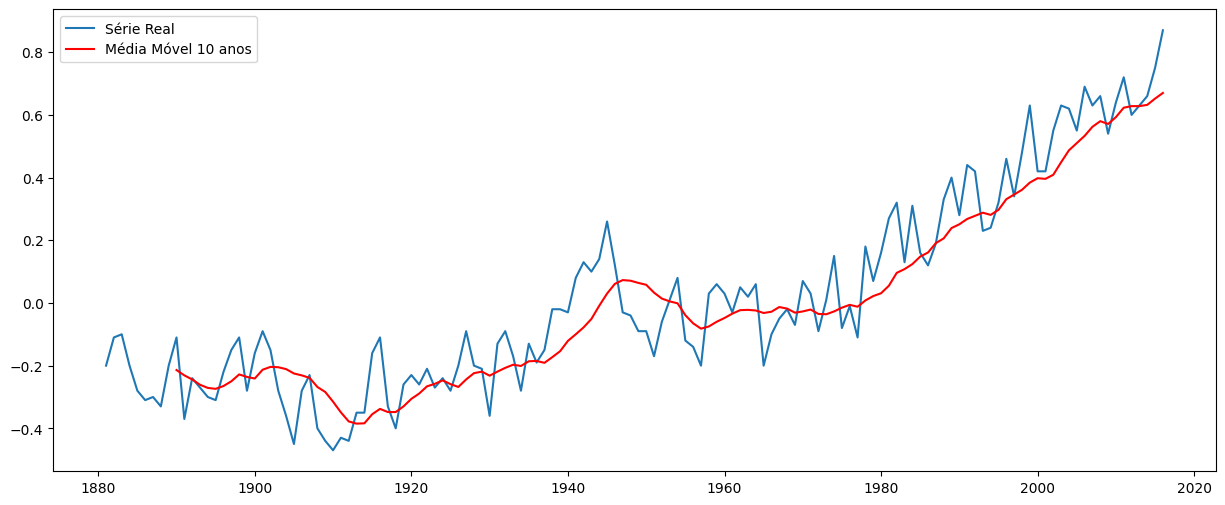

In [14]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel10,color='red', label='Média Móvel 10 anos')
plt.legend(loc='best')
plt.show()

In [16]:
media_movel20 = serie.rolling(window = 20)
media_movel20 = media_movel20.mean()

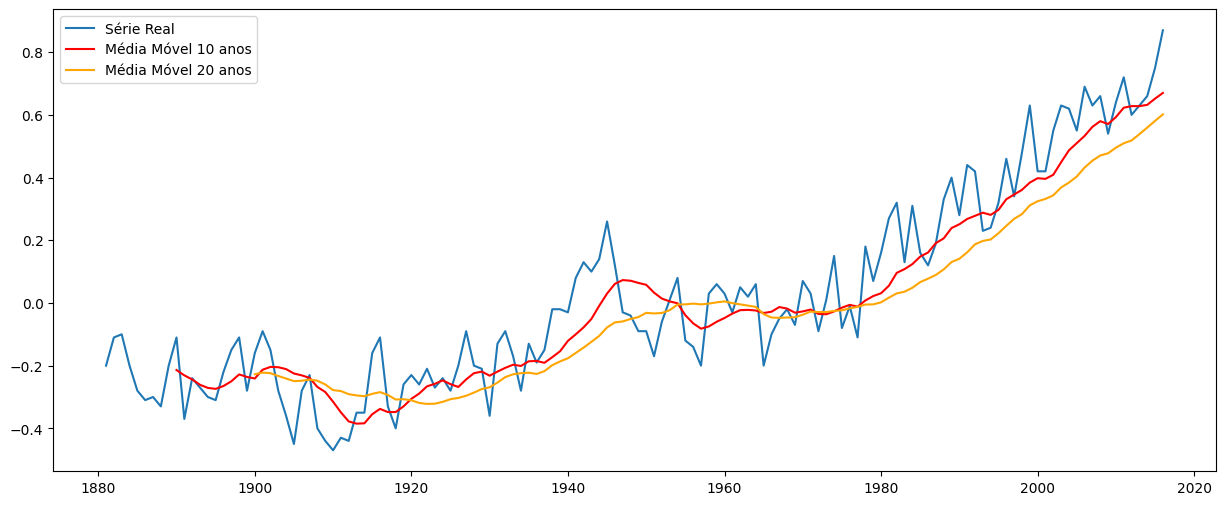

In [17]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel10,color='red', label='Média Móvel 10 anos')
plt.plot(media_movel20,color='orange', label='Média Móvel 20 anos')
plt.legend(loc='best')
plt.show()

## Média móvel centralizada

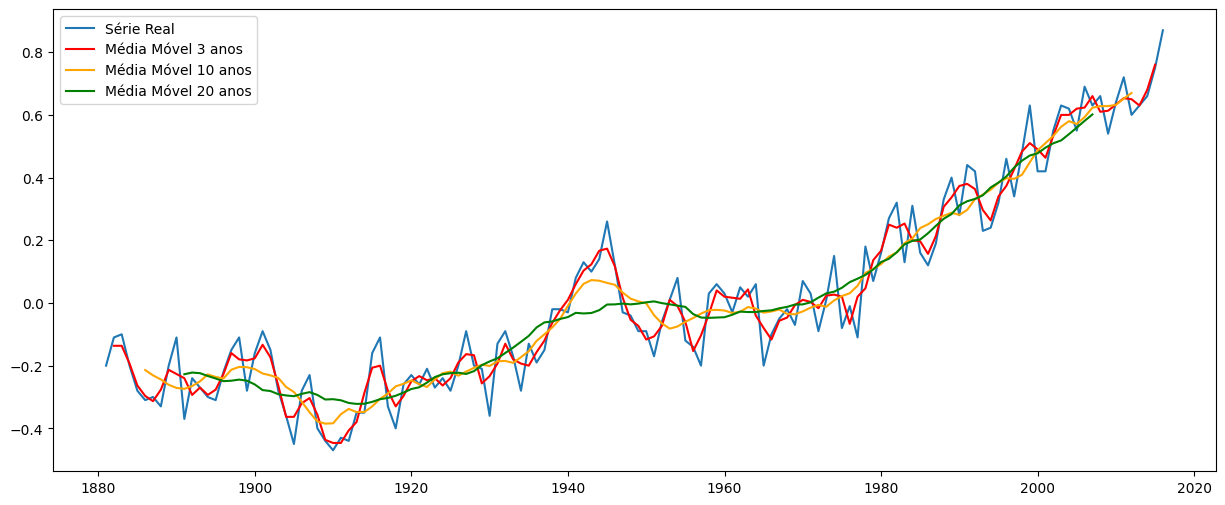

In [19]:
media_movel1_centralizada = serie.rolling(window = 3, center = True)
media_movel1_centralizada = media_movel1_centralizada.mean()

media_movel10_centralizada = serie.rolling(window = 10, center = True)
media_movel10_centralizada = media_movel10_centralizada.mean()


media_movel20_centralizada = serie.rolling(window = 20, center = True)
media_movel20_centralizada = media_movel20_centralizada.mean()


plt.plot(serie, label='Série Real')
plt.plot(media_movel1_centralizada,color='red', label='Média Móvel 3 anos')
plt.plot(media_movel10_centralizada,color='orange', label='Média Móvel 10 anos')
plt.plot(media_movel20_centralizada,color='green', label='Média Móvel 20 anos')
plt.legend(loc='best')
plt.show()

